In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Load the dataset and explore the variables.

In [3]:
customer = pd.read_csv('files_for_lab/customer_churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [4]:
X = customer.select_dtypes(include='number')
y = customer['Churn']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


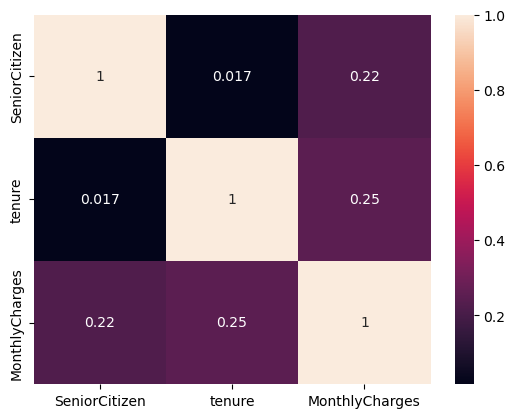

In [6]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Build the logistic regression model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [8]:
y_train.isna().sum()
y_test.isna().sum()

0

In [9]:
X_train

,SeniorCitizen,tenure,MonthlyCharges
2920,0,72,85.10
2966,1,14,46.35
6099,0,71,24.70
5482,0,33,73.90
2012,0,47,98.75
...,...,...,...
4931,0,15,103.45
3264,0,10,91.10
1653,0,58,20.75
2607,1,1,69.75


In [10]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) 
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
2920,-0.439763,1.612532,0.674154
2966,2.273954,-0.747907,-0.614894
6099,-0.439763,1.571835,-1.335097
5482,-0.439763,0.025340,0.301578
2012,-0.439763,0.595101,1.128231


In [11]:
y_train.head()

2920     No
2966     No
6099     No
5482    Yes
2012    Yes
Name: Churn, dtype: object

Even a simple model will give us more than 70% accuracy. Why?

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [13]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy of the model in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.39


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

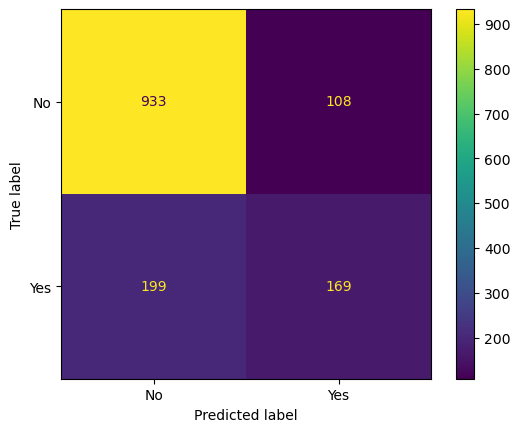

In [15]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

Accurary is more than 70% due to the class imbalance

No     5174
Yes    1869
Name: Churn, dtype: int64


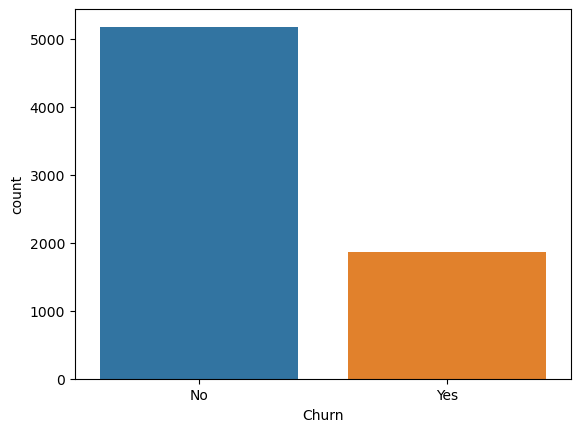

In [16]:
count_classes = customer['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer);
plt.show()

In [17]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=100,k_neighbors=5)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [20]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8266, 3)


In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.47
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.37


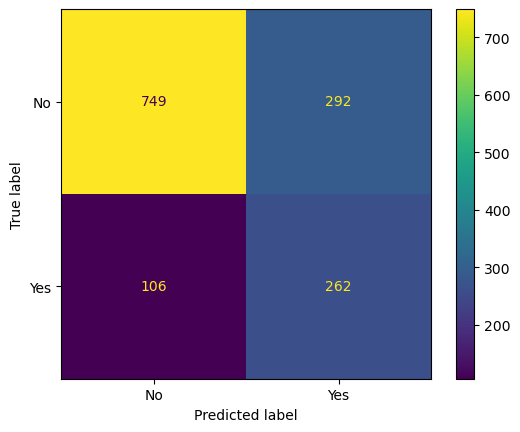

In [22]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

After applying the SMOTE only the recall and F1 where higher than before.